<h1 align="center"> The Battle of the Neighborhoods</h1> 

<h2 align="center"> Final project for Data Science Certificate through IBM and Coursera </h2>

<h3 align="center" > Created by Bob M </h3>

<h2 align="center"> Quality of Life in Ski Towns across America </h2> 

## Criteria

### Now that you have been equipped with the skills and the tools to use location data to explore a geographical location, over the course of two weeks, you will have the opportunity to be as creative as you want and come up with an idea to leverage the Foursquare location data to explore or compare neighborhoods or cities of your choice or to come up with a problem that you can use the Foursquare location data to solve. If you cannot think of an idea or a problem, here are some ideas to get you started:

In Module 3, we explored New York City and the city of Toronto and segmented and clustered their neighborhoods. Both cities are very diverse and are the financial capitals of their respective countries. One interesting idea would be to compare the neighborhoods of the two cities and determine how similar or dissimilar they are. Is New York City more like Toronto or Paris or some other multicultural city? I will leave it to you to refine this idea.

In a city of your choice, if someone is looking to open a restaurant, where would you recommend that they open it? Similarly, if a contractor is trying to start their own business, where would you recommend that they setup their office?

These are just a couple of many ideas and problems that can be solved using location data in addition to other datasets. No matter what you decide to do, make sure to provide sufficient justification of why you think what you want to do or solve is important and why would a client or a group of people be interested in your project.

<h2> Introduction </h2>

### 1. A description of the problem and a discussion of the background. (15 marks)

<h5> The Problem </h5> 

***"If you had an opportunity to take a job in another "Ski Town" outside of Burlington, which city would offer the same quality of life as provided in Burlington?"***

- Ski towns can be found scattered across America with many near larger metropolis areas. Outside the direct, rural towns at the bottom of the slope, here we dive deeper into the quality of life at 4 of the larger cities/towns near ski mountains and what really sets them apart. 

    - 1. In other words, out of the 4 chosen ski towns, what can the venues of each area tell us about the quality of life/ culture you may find there? 
        - What differentiates them apart and/or what similarities might they have?
        
    - 2. Out of curiosity from a Burlington local, which of the cities at large would be closest in comparison the Queen City? 
        - (Burlington, VT was previously refered to as Queen City many years ago.) 

<h5> Background </h5>

**"You either live close to where you work, or where you play"**
- John Gerndt of Burton Snowboards

The rising millenials in the workplace have been expanding what was previously known to be possible in work/life balances. Many are constantly seeking new adventures, but don't want to give up a good career path or job opportunity to enjoy what mother nature has to offer. This project was aimed to those seeking career opportunity in larger metropolis areas, while maintaining close proximity to ski resorts known for heavy snowfall. Proximity to a resort alone can't give insight into the culture of a town though. It's the shops, bustling restaraunts, dive bars, and sports bars. It's the small hole in the wall greek food or the food trucks found around a town that give it the character and the life in an area. While all areas were chosen as previously known to be considered "cities" near resorts, we are generalizing more job opportunity and career growth due to such. Later experimenting and adding in data on median salaries and job openings could help us gain more understanding towards what may be considered the "best quality of life", which is still only an opinion, but with a closer lens on the subjects. 


### 2. A description of the data and how it will be used to solve the problem. (15 marks)

We will be exploring Park City Utah, Denver Colorado, Seattle Washington, and Burlington VT through venue data pulled from the Foursquare API with data provided from the GeoNames database.

We chose the data from GeoNames as it had zip codes, county names, city names, and more info on each of the regions chosen. We use only the zip codes from the areas with the name Portland, Seattle, Denver, and Salt Lake City. For the Burlington VT area, we use all zip codes in Chittenden County in order to cast a wider web to make a better comparison over the area. 

We use the venue data pulled from the Foursquare API to run K-Means Clustering machine learning algorithms to cluster our zip codes based on frequency of top venues. 

With each zip code categorized to a cluster, we can see the frequency of each cluster type per city. The blend of the cluster, aka the percentage rates of each found per city, can be compared to gain a narrowed idea on the culture and type of life there. 

With the frequency of clusters of each city, we can use visualization from Seaborn libraries to see the differences and gain understanding of their relationship with each other. 

In [62]:
### 3. 

## Packages used from NYC lab, may be needed later. 

In [2]:
# Install package set from NYC lab.

# Beautiful soup for scraping web pages
import requests
from bs4 import BeautifulSoup

import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes #Uncomment to install needed package for maps. Note this will not be used until 2nd half of project 
                                            # and takes a while to install
    
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values (Also used for 2nd half.)

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


## Below is the code used to create a CSV file out of the US.txt file downloaded from geonames

Had a difficult time using IBM Studio to do this and therefore utilized python on my computer through terminal. I did turn off iCloud Drive in order to make for ease of finding the US.txt file. 

In [3]:
#df = pd.read_csv('./Desktop/US/US.txt', sep='\t', names=['country', 'postal_code', 'name', 'state_name', 'state_code', 'county_name', 'county_code', 'comm_name', 'comm_code', 'latitude', 'longitude', 'accuracy'])

#print(df)          PLEASE NOTE: Output shown to display how I checked to make sure it uploaded to the df correctly

#      country  postal_code        name  ... latitude longitude accuracy
#0          US        99553      Akutan  ...  54.1430 -165.7854      1.0
#1          US        99571    Cold Bay  ...  55.1858 -162.7211      1.0
#2          US        99583  False Pass  ...  54.8542 -163.4113      1.0
#3          US        99612   King Cove  ...  55.0628 -162.3056      1.0
#4          US        99661  Sand Point  ...  55.3192 -160.4914      1.0
#...       ...          ...         ...  ...      ...       ...      ...
#41465      US        96558      APO AA  ...  19.7542 -155.5858      4.0
#41466      US        96598      FPO AA  ... -89.9976  139.2729      NaN
#41467      US        96599      FPO AA  ... -77.8460  166.6760      NaN
#41468      US        96860      FPO AA  ...  21.3448 -157.9774      4.0
#41469      US        96863      FPO AA  ...  21.4505 -157.7680      4.0

#[41470 rows x 12 columns]

#df.to_csv('./Desktop/US/US.csv')       #Writing the CSV to the folder US on Desktop. 

## Importing the newly made csv file to IBM Studio through import files toolbar tab

In [4]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_6fc1870b29674070aaca59ef8ee33d6a = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='GxZHCeVc6Sn07U9onzA5tKtwTeVI53CVWCNOXf6NCc3P',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')


body = client_6fc1870b29674070aaca59ef8ee33d6a.get_object(Bucket='myproject-donotdelete-pr-btixyegyao6gfc',Key='US.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

uszips = pd.read_csv(body)
uszips.head()

,Unnamed: 0,country,postal_code,name,state_name,state_code,county_name,county_code,comm_name,comm_code,latitude,longitude,accuracy
0,0,US,99553,Akutan,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.1430,-165.7854,1.0
1,1,US,99571,Cold Bay,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.1858,-162.7211,1.0
2,2,US,99583,False Pass,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.8542,-163.4113,1.0
3,3,US,99612,King Cove,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.0628,-162.3056,1.0
4,4,US,99661,Sand Point,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.3192,-160.4914,1.0


In [5]:
uszips.dtypes

Unnamed: 0       int64
country         object
postal_code      int64
name            object
state_name      object
state_code      object
county_name     object
county_code    float64
comm_name       object
comm_code      float64
latitude       float64
longitude      float64
accuracy       float64
dtype: object

In [6]:
# Getting rid of extra column
uszips.drop(['Unnamed: 0'], axis=1, inplace=True)
uszips.head()

,country,postal_code,name,state_name,state_code,county_name,county_code,comm_name,comm_code,latitude,longitude,accuracy
0,US,99553,Akutan,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.1430,-165.7854,1.0
1,US,99571,Cold Bay,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.1858,-162.7211,1.0
2,US,99583,False Pass,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.8542,-163.4113,1.0
3,US,99612,King Cove,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.0628,-162.3056,1.0
4,US,99661,Sand Point,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.3192,-160.4914,1.0


In [7]:
# Getting rid of unneccessary country column

uszips.drop(['country','comm_name', 'comm_code', 'accuracy'], axis=1, inplace=True)
uszips.head()

,postal_code,name,state_name,state_code,county_name,county_code,latitude,longitude
0,99553,Akutan,Alaska,AK,Aleutians East,13.0,54.1430,-165.7854
1,99571,Cold Bay,Alaska,AK,Aleutians East,13.0,55.1858,-162.7211
2,99583,False Pass,Alaska,AK,Aleutians East,13.0,54.8542,-163.4113
3,99612,King Cove,Alaska,AK,Aleutians East,13.0,55.0628,-162.3056
4,99661,Sand Point,Alaska,AK,Aleutians East,13.0,55.3192,-160.4914


In [8]:
vtzips = uszips[uszips['state_name'] == 'Vermont']
vtzips.head()

,postal_code,name,state_name,state_code,county_name,county_code,latitude,longitude
37993,5443,Bristol,Vermont,VT,Addison,1.0,44.1460,-73.0717
37994,5456,Ferrisburgh,Vermont,VT,Addison,1.0,44.2056,-73.2462
37995,5469,Monkton,Vermont,VT,Addison,1.0,44.2404,-73.1347
37996,5472,New Haven,Vermont,VT,Addison,1.0,44.1126,-73.1735
37997,5473,North Ferrisburgh,Vermont,VT,Addison,1.0,44.2595,-73.2112


In [9]:
# zip code list for Chittenden County in vt

chittendenzips = vtzips[vtzips['county_name'] == 'Chittenden']
chittendenzips.head()

,postal_code,name,state_name,state_code,county_name,county_code,latitude,longitude
38050,5401,Burlington,Vermont,VT,Chittenden,7.0,44.4840,-73.2199
38051,5402,Burlington,Vermont,VT,Chittenden,7.0,44.4421,-73.0825
38052,5403,South Burlington,Vermont,VT,Chittenden,7.0,44.4513,-73.1796
38053,5404,Winooski,Vermont,VT,Chittenden,7.0,44.4949,-73.1874
38054,5405,Burlington,Vermont,VT,Chittenden,7.0,44.4421,-73.0825


In [10]:
# Zip code list for Salt Lake County

slczips = uszips[uszips['county_name'] == 'Salt Lake']
slczips

,postal_code,name,state_name,state_code,county_name,county_code,latitude,longitude
36571,84006,Bingham Canyon,Utah,UT,Salt Lake,35.0,40.5646,-112.0977
36572,84009,South Jordan,Utah,UT,Salt Lake,35.0,40.5622,-111.9297
36573,84020,Draper,Utah,UT,Salt Lake,35.0,40.5046,-111.8810
36574,84044,Magna,Utah,UT,Salt Lake,35.0,40.7009,-112.0809
36575,84047,Midvale,Utah,UT,Salt Lake,35.0,40.6152,-111.8851
36576,84065,Riverton,Utah,UT,Salt Lake,35.0,40.4954,-111.9444
36577,84070,Sandy,Utah,UT,Salt Lake,35.0,40.5794,-111.8816
36578,84081,West Jordan,Utah,UT,Salt Lake,35.0,40.6037,-112.0411
36579,84084,West Jordan,Utah,UT,Salt Lake,35.0,40.6254,-111.9677
36580,84088,West Jordan,Utah,UT,Salt Lake,35.0,40.5959,-111.9644


In [11]:
# Zip code list for Portland in OR.

orzips = uszips[uszips['state_code'] == 'OR']  # Creates list of OR zips

portlandzips = orzips[orzips['name'] == 'Portland'] # Finds the Portland zips in OR zips. 
portlandzips

,postal_code,name,state_name,state_code,county_name,county_code,latitude,longitude
29428,97222,Portland,Oregon,OR,Clackamas,5.0,45.4373,-122.6147
29429,97267,Portland,Oregon,OR,Clackamas,5.0,45.4021,-122.6144
29430,97268,Portland,Oregon,OR,Clackamas,5.0,45.5235,-122.6762
29431,97269,Portland,Oregon,OR,Clackamas,5.0,45.5235,-122.6762
29717,97201,Portland,Oregon,OR,Multnomah,51.0,45.5078,-122.6897
29718,97202,Portland,Oregon,OR,Multnomah,51.0,45.4840,-122.6365
29719,97203,Portland,Oregon,OR,Multnomah,51.0,45.5889,-122.7347
29720,97204,Portland,Oregon,OR,Multnomah,51.0,45.5181,-122.6745
29721,97205,Portland,Oregon,OR,Multnomah,51.0,45.5207,-122.6888
29722,97206,Portland,Oregon,OR,Multnomah,51.0,45.4840,-122.5973


In [12]:
denverzips = uszips[uszips['county_name'] == 'Denver']
denverzips

,postal_code,name,state_name,state_code,county_name,county_code,latitude,longitude
5051,80201,Denver,Colorado,CO,Denver,31.0,39.7263,-104.8568
5052,80202,Denver,Colorado,CO,Denver,31.0,39.7491,-104.9946
5053,80203,Denver,Colorado,CO,Denver,31.0,39.7313,-104.9811
5054,80204,Denver,Colorado,CO,Denver,31.0,39.7340,-105.0259
5055,80205,Denver,Colorado,CO,Denver,31.0,39.7590,-104.9661
5056,80206,Denver,Colorado,CO,Denver,31.0,39.7331,-104.9524
5057,80207,Denver,Colorado,CO,Denver,31.0,39.7584,-104.9177
5058,80208,Denver,Colorado,CO,Denver,31.0,39.7392,-104.9847
5059,80209,Denver,Colorado,CO,Denver,31.0,39.7074,-104.9686
5060,80210,Denver,Colorado,CO,Denver,31.0,39.6790,-104.9631


In [13]:
seattlezips = uszips[uszips['name'] == 'Seattle']
seattlezips

,postal_code,name,state_name,state_code,county_name,county_code,latitude,longitude
38513,98101,Seattle,Washington,WA,King,33.0,47.6114,-122.3305
38514,98102,Seattle,Washington,WA,King,33.0,47.6302,-122.3210
38515,98103,Seattle,Washington,WA,King,33.0,47.6733,-122.3426
38516,98104,Seattle,Washington,WA,King,33.0,47.6036,-122.3256
38517,98105,Seattle,Washington,WA,King,33.0,47.6633,-122.3022
38518,98106,Seattle,Washington,WA,King,33.0,47.5344,-122.3547
38519,98107,Seattle,Washington,WA,King,33.0,47.6701,-122.3763
38520,98108,Seattle,Washington,WA,King,33.0,47.5413,-122.3129
38521,98109,Seattle,Washington,WA,King,33.0,47.6339,-122.3476
38522,98111,Seattle,Washington,WA,King,33.0,47.6062,-122.3321


In [14]:
skicounties = [slczips, denverzips, chittendenzips, portlandzips, seattlezips]
skitownzips = pd.concat(skicounties)
skitownzips

,postal_code,name,state_name,state_code,county_name,county_code,latitude,longitude
36571,84006,Bingham Canyon,Utah,UT,Salt Lake,35.0,40.5646,-112.0977
36572,84009,South Jordan,Utah,UT,Salt Lake,35.0,40.5622,-111.9297
36573,84020,Draper,Utah,UT,Salt Lake,35.0,40.5046,-111.8810
36574,84044,Magna,Utah,UT,Salt Lake,35.0,40.7009,-112.0809
36575,84047,Midvale,Utah,UT,Salt Lake,35.0,40.6152,-111.8851
36576,84065,Riverton,Utah,UT,Salt Lake,35.0,40.4954,-111.9444
36577,84070,Sandy,Utah,UT,Salt Lake,35.0,40.5794,-111.8816
36578,84081,West Jordan,Utah,UT,Salt Lake,35.0,40.6037,-112.0411
36579,84084,West Jordan,Utah,UT,Salt Lake,35.0,40.6254,-111.9677
36580,84088,West Jordan,Utah,UT,Salt Lake,35.0,40.5959,-111.9644


## Part Two: Putting these zip codes on the map. 

In [18]:
!conda install -c conda-forge geopy --yes #Uncomment to install needed package for maps. Note this will not be used until 2nd half of project 
                                            # and takes a while to install

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - esri/linux-64::arcgis==1.6.0=py37h39e3cac_1
  - defaults/linux-64::numpy-base==1.18.5=py37hde5b4d6_0
done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    anyio-3.1.0                |   py37h89c1867_0         136 KB  conda-forge
    babel-2.9.1                |     pyh44b312d_0         6.2 MB  conda-forge
    blas-2.3                   |         openblas          11 KB  conda-forge
    icu-67.1                   |       he1b5a44_0        12.9 MB  conda-forge
    jupyter_server-1.8.0       |     pyhd8ed1ab_0         255 KB  conda-forge
    jupyterlab-3.0.16          |     pyhd8ed1ab_0         5.7 MB  conda-forge
    jupyt

pyshp-2.1.3          | 36 KB     | ##################################### | 100% 
libcblas-3.9.0       | 11 KB     | ##################################### | 100% 
jupyterlab-3.0.16    | 5.7 MB    | ##################################### | 100% 
anyio-3.1.0          | 136 KB    | ##################################### | 100% 
sniffio-1.2.0        | 15 KB     | ##################################### | 100% 
libopenblas-0.3.12   | 8.2 MB    | ##################################### | 100% 
liblapack-3.9.0      | 11 KB     | ##################################### | 100% 
jupyter_server-1.8.0 | 255 KB    | ##################################### | 100% 
nbclassic-0.3.1      | 18 KB     | ##################################### | 100% 
keyring-23.0.1       | 49 KB     | ##################################### | 100% 
websocket-client-0.5 | 59 KB     | ##################################### | 100% 
babel-2.9.1          | 6.2 MB    | ##################################### | 100% 
matplotlib-3.2.2     | 6 KB 

In [19]:
!conda install -c conda-forge folium=0.5.0 --yes # Also used for mapping in 2nd half of project. 

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         713 KB

The following NEW packages will be INSTALLED:

  altair             conda-forge/noarch::altair-4.1.0-py_1
  branca             conda-forge/noarch::branca-0.4.2-pyhd8ed1ab_0
  fol

In [20]:
import folium # map rendering library

In [21]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values. **Already have these from OG dataset,
                                        # but will add for poject purposes. 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Folium used as well, but installed in above cell. 

print('Libraries imported.')

Libraries imported.


<h3 align=center> Geographical Center of the USA </h3>

<h3 align=center> 39.8283° N, 98.5795° W </h3>

<h4 align=center> Will use this to create a zoomed out map, consisting of all the cities found in our skitown zip codes. </h4> 

In [22]:
USCentlat = 39.8283
USCentlong = -98.5795
print('The geograpical coordinate of the center of the USA are {}, {}.'.format(USCentlat, USCentlong))

The geograpical coordinate of the center of the USA are 39.8283, -98.5795.


In [23]:
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
#%matplotlib inline 

from sklearn.cluster import KMeans 
#from sklearn.datasets import make_blobs
# .samples_generator  --- took this off of the end of datasets and the code ran without errors. 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe. This is added, but not used 
                                          # in this notebook as we do not download any json files.

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Libraries installed.')

Libraries installed.


In [24]:
# Creating a map of the USA using latitude and longitude values from above cell. 
map_usa = folium.Map(location=[USCentlat,USCentlong], zoom_start=4)

# Now I need to add the markers from our skitownzips dataframe to the folium map. 
for lat, lng, name, postal_code in zip(skitownzips['latitude'], skitownzips['longitude'], skitownzips['name'], skitownzips['postal_code'],):
    label = '{}, {}'.format(name, postal_code)
    label = folium.Popup(label,parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup =label,
        color ='blue',
        fill=True,
        fill_color = '#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_usa)
map_usa

## Starting to pull venue data using Foursquare API for these ski town zip codes. 

In [25]:
#@hidden_cell
CLIENT_ID = 'PM2E4DLUPWL5VAXFOQ5P2HRU2KL2H3EECL5QHQDBB4XJBHMQ' # My Foursquare ID
#@hidden_cell
CLIENT_SECRET = '0R2DCB04FYS0PPFPQIULIGDNYECOJTWAYDYPR1DPQSFTYTEE' # Foursquare secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PM2E4DLUPWL5VAXFOQ5P2HRU2KL2H3EECL5QHQDBB4XJBHMQ
CLIENT_SECRET:0R2DCB04FYS0PPFPQIULIGDNYECOJTWAYDYPR1DPQSFTYTEE


In [27]:
LIMIT = 100 #added this in to this cell. Limits the call to just 100 venues for each neighborhood. 

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [28]:
skitown_venues = getNearbyVenues(names=skitownzips['name'],
                                   latitudes=skitownzips['latitude'],
                                   longitudes=skitownzips['longitude']
                                  )

Bingham Canyon
South Jordan
Draper
Magna
Midvale
Riverton
Sandy
West Jordan
West Jordan
West Jordan
Sandy
Sandy
Sandy
Sandy
Sandy
South Jordan
Herriman
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
West Valley City
West Valley City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
West Valley City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Salt Lake City
Denver
Denver
Den

In [31]:
print(skitown_venues.shape)
skitown_venues.head(200)

(6784, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bingham Canyon,40.5646,-112.0977,Copperton Park,40.562789,-112.098456,Playground
1,Bingham Canyon,40.5646,-112.0977,United States Postal Service,40.565938,-112.094933,Post Office
2,South Jordan,40.5622,-111.9297,The Gun Vault,40.561467,-111.927476,Gun Shop
3,South Jordan,40.5622,-111.9297,Schmidt's Pastry Cottage,40.561206,-111.924704,Bakery
4,South Jordan,40.5622,-111.9297,Goldfish Swim School - South Jordan,40.562746,-111.930223,Pool
5,South Jordan,40.5622,-111.9297,Davis Vision Center,40.561044,-111.929651,Doctor's Office
6,South Jordan,40.5622,-111.9297,Red Dragon Chinese Bistro,40.561932,-111.931412,Chinese Restaurant
7,South Jordan,40.5622,-111.9297,Arctic Circle,40.561810,-111.931450,Fast Food Restaurant
8,South Jordan,40.5622,-111.9297,Sodalicious,40.561990,-111.932140,Snack Place
9,South Jordan,40.5622,-111.9297,Holt Farmstead Pavillion,40.564308,-111.928528,Park


In [32]:
skitown_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bingham Canyon,2,2,2,2,2,2
Burlington,39,39,39,39,39,39
Charlotte,1,1,1,1,1,1
Colchester,8,8,8,8,8,8
Denver,1955,1955,1955,1955,1955,1955
Draper,8,8,8,8,8,8
Essex,3,3,3,3,3,3
Essex Junction,10,10,10,10,10,10
Huntington,1,1,1,1,1,1


## How many unique categories? 

In [33]:
print('There are {} uniques categories.'.format(len(skitown_venues['Venue Category'].unique())))

There are 326 uniques categories.


## Time to analyze

In [34]:
# one hot encoding
skitown_onehot = pd.get_dummies(skitown_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood latitude column back to dataframe
#skitown_onehot['Neighborhood Latitude'] = skitown_venues['Neighborhood Latitude'] 
skitown_onehot['Neighborhood'] = skitown_venues['Neighborhood']

# move neighborhood latitude column to the first column
fixed_columns = [skitown_onehot.columns[-1]] + list(skitown_onehot.columns[:-1])
skitown_onehot = skitown_onehot[fixed_columns]

skitown_onehot.head(25)

,Yoga Studio,ATM,Accessories Store,Acupuncturist,African Restaurant,Airport Lounge,Airport Service,American Restaurant,Amphitheater,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Astrologer,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Campground,Candy Store,Car Wash,Caribbean Restaurant,Casino,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Baseball Diamond,College Cafeteria,College Theater,Comedy Club,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Credit Union,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Eye Doctor,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Fishing Spot,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Heliport,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Lawyer,Leather Goods Store,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Mongolian Restaurant,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nature Preserve,Neighborhood,New American Restaurant,Night Market,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pizza Place,Planetarium,Playground,Plaza,Poke Place,Pool,Pool Hall,Post Office,Print Shop,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,River,Road,Rock Climbing Spot,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Soup Place,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Spi

In [35]:
#skitown_onehot.drop(['Neighborhood'], axis=1, inplace=True)

In [36]:
skitown_grouped = skitown_onehot.groupby('Neighborhood').mean().reset_index()
skitown_grouped

,Neighborhood,Yoga Studio,ATM,Accessories Store,Acupuncturist,African Restaurant,Airport Lounge,Airport Service,American Restaurant,Amphitheater,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Astrologer,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Campground,Candy Store,Car Wash,Caribbean Restaurant,Casino,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Baseball Diamond,College Cafeteria,College Theater,Comedy Club,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Credit Union,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Eye Doctor,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Fishing Spot,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Heliport,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Lawyer,Leather Goods Store,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Mongolian Restaurant,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nature Preserve,New American Restaurant,Night Market,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pizza Place,Planetarium,Playground,Plaza,Poke Place,Pool,Pool Hall,Post Office,Print Shop,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,River,Road,Rock Climbing Spot,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Soup Place,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Spi

## Let's print each neighborhood along with the top 5 most common venues

In [37]:
num_top_venues = 5

for hood in skitown_grouped['Neighborhood']:
    print("-"+hood+"-")
    temp = skitown_grouped[skitown_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

-Bingham Canyon-
             venue  freq
0      Post Office   0.5
1       Playground   0.5
2        Nightclub   0.0
3  Other Nightlife   0.0
4  Organic Grocery   0.0


-Burlington-
                        venue  freq
0            Business Service  0.10
1  Construction & Landscaping  0.08
2          Photography Studio  0.08
3         Arts & Crafts Store  0.08
4                         Pub  0.05


-Charlotte-
             venue  freq
0            Trail   1.0
1      Yoga Studio   0.0
2        Nightclub   0.0
3  Other Nightlife   0.0
4  Organic Grocery   0.0


-Colchester-
            venue  freq
0    Intersection  0.25
1        Pharmacy  0.12
2            Park  0.12
3      Bagel Shop  0.12
4  Boarding House  0.12


-Denver-
                 venue  freq
0       Sandwich Place  0.06
1                Hotel  0.05
2          Coffee Shop  0.04
3  American Restaurant  0.03
4   Mexican Restaurant  0.03


-Draper-
            venue  freq
0     IT Services  0.12
1             Spa  0.12
2  Sandwich

In [38]:
skitown_grouped['Neighborhood'] = skitown_grouped['Neighborhood'].astype(str)

### Let's put that into a pandas dataframe
Writing a function to sort the venues in descending order.

In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Now let's create the new dataframe and display the top 10 venues for each neighborhood.¶


In [40]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = skitown_grouped['Neighborhood']

for ind in np.arange(skitown_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(skitown_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(25)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bingham Canyon,Post Office,Playground,Farm,Eastern European Restaurant,Electronics Store
1,Burlington,Business Service,Photography Studio,Arts & Crafts Store,Construction & Landscaping,Deli / Bodega
2,Charlotte,Trail,Women's Store,Farm,Eastern European Restaurant,Electronics Store
3,Colchester,Intersection,Donut Shop,Bagel Shop,Boarding House,History Museum
4,Denver,Sandwich Place,Hotel,Coffee Shop,Mexican Restaurant,Pizza Place
5,Draper,Coffee Shop,Sandwich Place,Pizza Place,IT Services,Spa
6,Essex,Gas Station,Construction & Landscaping,Playground,Women's Store,Electronics Store
7,Essex Junction,Arts & Crafts Store,Home Service,Bakery,Mini Golf,Construction & Landscaping
8,Huntington,Scenic Lookout,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant
9,Jonesville,Post Office,River,Flea Market,Duty-free Shop,Eastern European Restaurant


## Creating Clusters with K Means

### Creating the cluster labels

In [41]:
# Before I go ahead and select a number of clusters, I need to run the elbow method and after that the silhoutte method if nothing is discovered. 

# Insert methods here

In [42]:
import matplotlib.pyplot as plt

<h4> The Elbow Method: </h4>
Used to determine the optimal K value to use for clustering. 

Data sets needed: 
- skitown_grouped
- skitown_grouped_clustering

In [43]:
skitown_grouped_clustering = skitown_grouped.drop('Neighborhood',1)

1 

OSError: dlopen() error

OSError: dlopen() error

OSError: dlopen() error

OSError: dlopen() error

OSError: dlopen() error

OSError: dlopen() error

OSError: dlopen() error

OSError: dlopen() error

OSError: dlopen() error

OSError: dlopen() error

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

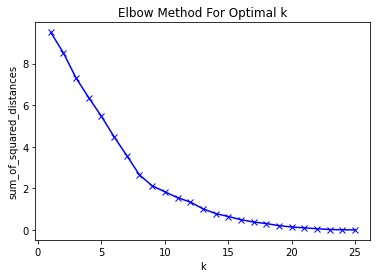

In [44]:
sum_of_squared_distances = []
K = range(1,26)
for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k).fit(skitown_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k');

This method does not really help us as it continually declines as opposed to finding the optimal cluster amounts.

<h4> Silhoulette Method </h4> 
This is another approach to determining optimal k clusters. 

- Silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (seperation). Source: Wikipedia


In [45]:
from sklearn.metrics import silhouette_score

sil = []
K_sil = range(2,26)
# minimum 2 clusters required, to define dissimilarity
for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(skitown_grouped_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(skitown_grouped_clustering, labels, metric = 'euclidean'))

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

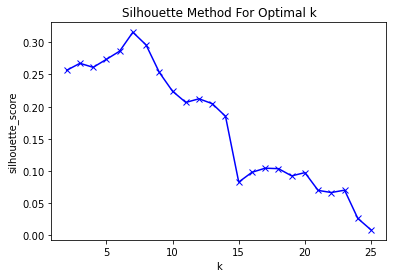

In [46]:
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()

 So from this info, this leads me to understand that the optimal k cluster value would either be 8, 12, or 18. I chose 8 being it had the near best silhoutte score while breaking up the clusters well.  

Dad's advice for visualing clusters. 

Make each venue category a numerical value. and then graph the intersection of the two. 
How frequently does pizza dn skateparks show up, et. etc. 

In [47]:
# set number of clusters
kclusters = 8

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(skitown_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 5, 2, 2, 2, 2, 2, 6, 2], dtype=int32)

Adding the cluster labels and creating a new df called skitown_merged with both the neighborhood_venues_sorted df and skitownzips df.

In [48]:
skitownzips.head()

,postal_code,name,state_name,state_code,county_name,county_code,latitude,longitude
36571,84006,Bingham Canyon,Utah,UT,Salt Lake,35.0,40.5646,-112.0977
36572,84009,South Jordan,Utah,UT,Salt Lake,35.0,40.5622,-111.9297
36573,84020,Draper,Utah,UT,Salt Lake,35.0,40.5046,-111.8810
36574,84044,Magna,Utah,UT,Salt Lake,35.0,40.7009,-112.0809
36575,84047,Midvale,Utah,UT,Salt Lake,35.0,40.6152,-111.8851


In [49]:
skitownzips = skitownzips.rename(columns={'latitude': 'Neighborhood Latitude'})
skitownzips = skitownzips.rename(columns={'name': 'Neighborhood'})
skitownzips.head()

,postal_code,Neighborhood,state_name,state_code,county_name,county_code,Neighborhood Latitude,longitude
36571,84006,Bingham Canyon,Utah,UT,Salt Lake,35.0,40.5646,-112.0977
36572,84009,South Jordan,Utah,UT,Salt Lake,35.0,40.5622,-111.9297
36573,84020,Draper,Utah,UT,Salt Lake,35.0,40.5046,-111.8810
36574,84044,Magna,Utah,UT,Salt Lake,35.0,40.7009,-112.0809
36575,84047,Midvale,Utah,UT,Salt Lake,35.0,40.6152,-111.8851


In [50]:
# Making the neighborhoods_venues_sorted Latitute column a float so as to combine it with skitownzips df below without error due to seperate data types.

#neighborhoods_venues_sorted['Neighborhood Latitude'] = neighborhoods_venues_sorted['Neighborhood Latitude'].astype(float)
neighborhoods_venues_sorted.dtypes

Neighborhood             object
1st Most Common Venue    object
2nd Most Common Venue    object
3rd Most Common Venue    object
4th Most Common Venue    object
5th Most Common Venue    object
dtype: object

In [51]:
#Had problem here as there are multiple zip codes with the same city name. Therefore could not combine the two df's. Reworked the entire code to use 
# latitude as identifier. Then in this code block, I bring together the df's bringing back postal code and city name.

# This try/except code helps to run the code over and over without error message. 
try:
    neighborhoods_venues_sorted.drop(['Cluster Labels'], axis = 1, inplace= True)
except:
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

skitown_merged = skitownzips

# merge skitown_grouped with skitown_data to add latitude/longitude for each neighborhood
skitown_merged = skitown_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
skitown_merged.head() # check the last columns!

,postal_code,Neighborhood,state_name,state_code,county_name,county_code,Neighborhood Latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
36571,84006,Bingham Canyon,Utah,UT,Salt Lake,35.0,40.5646,-112.0977,2.0,Post Office,Playground,Farm,Eastern European Restaurant,Electronics Store
36572,84009,South Jordan,Utah,UT,Salt Lake,35.0,40.5622,-111.9297,2.0,Clothing Store,Pool,Home Service,Fast Food Restaurant,Snack Place
36573,84020,Draper,Utah,UT,Salt Lake,35.0,40.5046,-111.8810,2.0,Coffee Shop,Sandwich Place,Pizza Place,IT Services,Spa
36574,84044,Magna,Utah,UT,Salt Lake,35.0,40.7009,-112.0809,1.0,Fast Food Restaurant,Women's Store,Farm,Eastern European Restaurant,Electronics Store
36575,84047,Midvale,Utah,UT,Salt Lake,35.0,40.6152,-111.8851,0.0,Hotel,Food Truck,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant


In [52]:
# just to clean it up a bit, lets change longitude to neighborhood longtitude as well. 
skitown_merged = skitown_merged.rename(columns={'longitude': 'Neighborhood Longitude'})
skitown_merged.head()

,postal_code,Neighborhood,state_name,state_code,county_name,county_code,Neighborhood Latitude,Neighborhood Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
36571,84006,Bingham Canyon,Utah,UT,Salt Lake,35.0,40.5646,-112.0977,2.0,Post Office,Playground,Farm,Eastern European Restaurant,Electronics Store
36572,84009,South Jordan,Utah,UT,Salt Lake,35.0,40.5622,-111.9297,2.0,Clothing Store,Pool,Home Service,Fast Food Restaurant,Snack Place
36573,84020,Draper,Utah,UT,Salt Lake,35.0,40.5046,-111.8810,2.0,Coffee Shop,Sandwich Place,Pizza Place,IT Services,Spa
36574,84044,Magna,Utah,UT,Salt Lake,35.0,40.7009,-112.0809,1.0,Fast Food Restaurant,Women's Store,Farm,Eastern European Restaurant,Electronics Store
36575,84047,Midvale,Utah,UT,Salt Lake,35.0,40.6152,-111.8851,0.0,Hotel,Food Truck,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant


In [53]:
# This cleans the column Cluster labels, getting rid of the nan values that would not allow the column to convert to int.
skitown_merged = skitown_merged[~skitown_merged['Cluster Labels'].isnull()]

# Converting Cluster labels data type from float to int to allow for mapping below. 
skitown_merged[['Cluster Labels']] = skitown_merged[['Cluster Labels']].astype(int)

In [54]:
# create map
map_clusters = folium.Map(location=[USCentlat,USCentlong], zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(skitown_merged['Neighborhood Latitude'], skitown_merged['Neighborhood Longitude'], skitown_merged['Neighborhood'], skitown_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

- Increased number of clusters from 5 to 8 so as to breakup cluster 1 
- Changed the top venues from just top 10 to top 20
- Changed cluster amount to 40 from 20. Starting to get a bit outlandish. 
    - Did help seperate them though. 
Notes: 
- Going from 5 to 8 clusters didn't make a large impact. 
- Going from 8 to 20 clusters also did not make a major impact, although made Salt Lake stick out as different. 

Tasks: 
- Need to determine the frequency of each type of clusters in the provided regions. 
- Use that to compare each region with each other. 
- also need to figure out how to find the optimal # of clusters needed. 

## Visualizing the Categorical Data using Seaborn Libraries 

In [55]:
# Now we are trying to answer some of the questions above. How can we determine what city/ county might be right for us? 

In [56]:
import seaborn as sns

In [57]:
#Checking data types tells us that we won't be able to visualize below due to needing to change Cluster Labels  back to Str from In

skitown_merged.dtypes

postal_code                 int64
Neighborhood               object
state_name                 object
state_code                 object
county_name                object
county_code               float64
Neighborhood Latitude     float64
Neighborhood Longitude    float64
Cluster Labels              int64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
dtype: object

In [58]:
# Changing Cluster Labels to Str to display below. 
skitown_merged[['Cluster Labels']] = skitown_merged[['Cluster Labels']].astype(str)

In [59]:
skitown_merged.dtypes

postal_code                 int64
Neighborhood               object
state_name                 object
state_code                 object
county_name                object
county_code               float64
Neighborhood Latitude     float64
Neighborhood Longitude    float64
Cluster Labels             object
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
dtype: object

In [60]:
num_top_venues = 5

for cluster in skitown_merged['Cluster Labels']:
    print('-'+cluster+'-')
    temp = skitown_merged[skitown_merged['Cluster Labels'] == cluster].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

-2-


ValueError: Length mismatch: Expected axis has 256 elements, new values have 2 elements